In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from scipy.spatial.distance import cdist

%matplotlib inline

In [40]:
df_dados = pd.read_csv('../data/features.csv', sep=';', index_col=0, dtype={'nu_CPFCNPJ':str})
print(df_dados.shape)
df_dados.head()

(2075, 15)


,nu_CPFCNPJ,qtdAditivosPorCPFCNPJ,qtdContratos,vl_TotalContrato,vl_Contrato,participacoes,valor_total_pregao,valor_total_tomada,valor_total_convite,participacoes_pregao,participacoes_tomada,participacoes_convite,label,label_pred,confianca
0,10140642000140,26,8,415668.77,71257.0,5,0.0,0.0,71257.0,0.0,0.0,5.0,0,0,1.0
1,10142026000128,19,3,67887.20,64587.2,2,0.0,0.0,64587.2,0.0,0.0,2.0,0,0,1.0
2,10158142000135,11,1,80900.00,80900.0,1,0.0,0.0,80900.0,0.0,0.0,1.0,0,0,1.0
3,10171194000141,4,1,45285.00,45285.0,1,0.0,0.0,45285.0,0.0,0.0,1.0,0,0,1.0
4,10175041000172,45,4,144250.00,133450.0,5,31050.0,0.0,102400.0,1.0,0.0,4.0,0,0,1.0


In [41]:
df_inidon = pd.read_csv('../data/ceis102016.csv', sep='\t', dtype={'CPF ou CNPJ do Sancionado':str})
df_inidon = df_inidon.rename(columns={'CPF ou CNPJ do Sancionado':'nu_CPFCNPJ'})
df_inidon = df_inidon.dropna(subset=['nu_CPFCNPJ'])
print(df_inidon.shape)
df_inidon.head()

(27270, 17)


,Tipo de Pessoa,nu_CPFCNPJ,Nome Informado pelo Órgão Sancionador,Razão Social - Cadastro Receita,Nome Fantasia - Cadastro Receita,Número do processo,Tipo Sanção,Data Início Sanção,Data Final Sanção,Órgão Sancionador,UF Órgão Sancionador,Origem Informações,Data Origem Informações,Data Publicação,Publicação,Detalhamento,Abrangência definida em decisão judicial
0,Física,01540142817,01540142817,FAIAD HABIB ZAKIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,00001655520138260240,Proibição - Lei de Improbidade,08/09/2014,08/09/2019,Tribunal de Justiça do Estado de São Paulo / 1...,SP,Conselho Nacional de Justiça,08/05/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Física,01540142817,01540142817,FAIAD HABIB ZAKIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,2400120120008920,Proibição - Lei de Improbidade,13/08/2014,13/08/2019,Tribunal de Justiça do Estado de São Paulo / 1...,SP,Conselho Nacional de Justiça,10/12/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Física,01540142817,01540142817,FAIAD HABIB ZAKIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_merge = df_dados.merge(df_inidon[['nu_CPFCNPJ']], on='nu_CPFCNPJ')
print(df_merge.shape)
df_merge.head()

(31, 15)


,nu_CPFCNPJ,qtdAditivosPorCPFCNPJ,qtdContratos,vl_TotalContrato,vl_Contrato,participacoes,valor_total_pregao,valor_total_tomada,valor_total_convite,participacoes_pregao,participacoes_tomada,participacoes_convite,label,label_pred,confianca
0,10818853000199,38,4,2980833.75,70009.06,4,0.0,0.00,70009.06,0.0,0.0,4.0,0,0,1.00
1,11622715000100,415,25,13179249.17,10070980.20,38,0.0,9966835.52,104144.68,0.0,31.0,7.0,1,1,0.00
2,12085495000188,153,20,1174833.51,165149.51,4,101525.0,14842.00,48782.51,1.0,1.0,2.0,0,0,0.47
3,14510053000167,20,1,200022.45,200022.45,1,0.0,200022.45,0.00,0.0,1.0,0.0,0,0,1.00
4,14510053000167,20,1,200022.45,200022.45,1,0.0,200022.45,0.00,0.0,1.0,0.0,0,0,1.00


In [43]:
def plot_samples(samples, labels):
    plt.figure(figsize=(10,6))
    for l, c in zip([0, 1], ['red', 'blue']):
        plt.scatter(samples[labels==l,0], samples_pca[labels==l,1], c=c)
        
def process_samples(samples):
    std = StandardScaler()
    samples = std.fit_transform(samples)

    kmeans = KMeans(n_clusters=2)
    labels = kmeans.fit_predict(samples)
    print(np.bincount(labels))

    pca = PCA(n_components=2)
    samples_pca = pca.fit_transform(samples)
    print(np.cumsum(pca.explained_variance_ratio_))
    
    plot_samples(samples_pca, labels)

[2068    7]
[ 0.47146543  0.64691026]


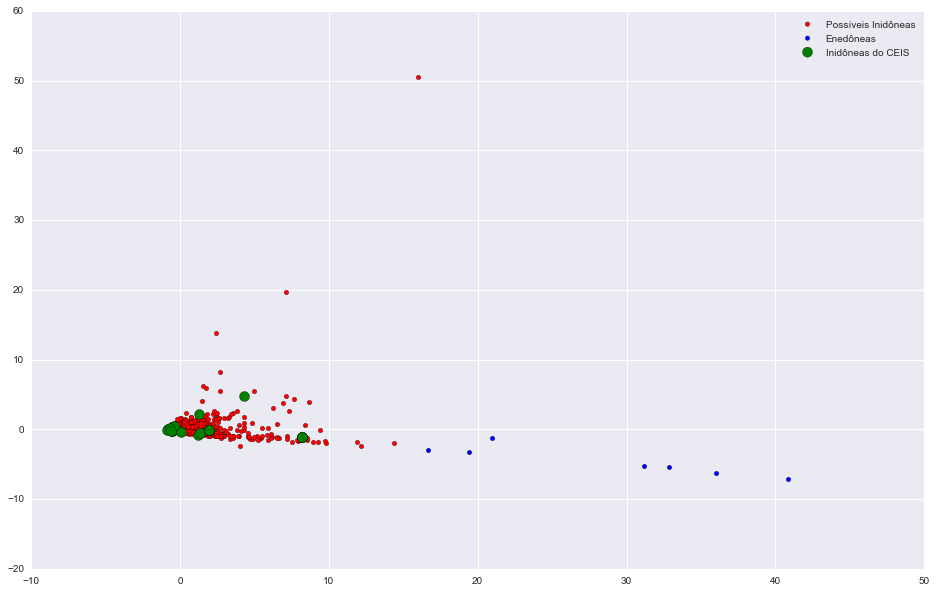

In [54]:
samples = df_dados.drop(['nu_CPFCNPJ', 'label', 'label_pred', 'confianca'], axis=1).values
samples_merge = df_merge.drop(['nu_CPFCNPJ', 'label', 'label_pred', 'confianca'], axis=1).values

std = StandardScaler()
std.fit(samples)
samples = std.transform(samples)
samples_merge = std.transform(samples_merge)

kmeans = KMeans(n_clusters=2)
kmeans.fit(samples)
labels = kmeans.predict(samples)
print(np.bincount(labels))

pca = PCA(n_components=2)
pca.fit(samples)
samples_pca = pca.transform(samples)
samples_merge = pca.transform(samples_merge)
print(np.cumsum(pca.explained_variance_ratio_))

plt.figure(figsize=(16,10))
p1 = plt.scatter(samples_pca[labels==0,0], samples_pca[labels==0,1], c='red', label='Possíveis Inidôneas')
p2 = plt.scatter(samples_pca[labels==1,0], samples_pca[labels==1,1], c='blue', label='Enedôneas')
p3 = plt.scatter(samples_merge[:,0], samples_merge[:,1], s=100, c='green', label='Inidôneas do CEIS')
plt.legend(handles=[p1, p2, p3])
plt.savefig('../figures/PCA.png', dpi=300)

In [ ]:
samples = df_dados.drop('nu_CPFCNPJ', axis=1).values

process_samples(samples)

[1512  563]
(2075, 11) (31, 11) (2075, 31)
0.0 53.9678464323 4.91886940951


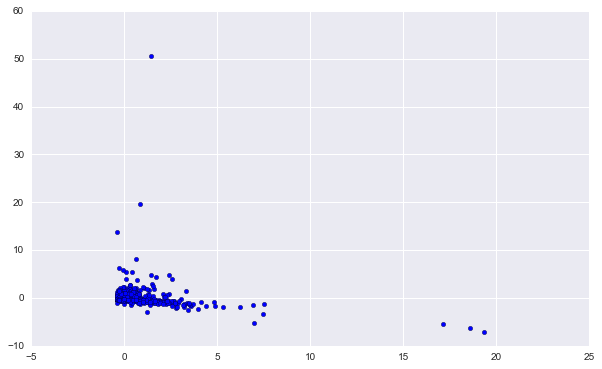

In [24]:
samples = df_dados.drop('nu_CPFCNPJ', axis=1).values
samples_merge = df_merge.drop('nu_CPFCNPJ', axis=1).values

std = StandardScaler()
std.fit(samples)
samples = std.transform(samples)
samples_merge = std.transform(samples_merge)

dist = cdist(samples, samples_merge)
threshold = 1.0
labels[dist[:,0] < threshold] = 0
labels[dist[:,0] >= threshold] = 1
print(np.bincount(labels))

print(samples.shape, samples_merge.shape, dist.shape)
print(dist.min(), dist.max(), dist.mean())
plot_samples(samples, labels)

In [25]:
df_dados['label'] = labels
df_dados.head()

,nu_CPFCNPJ,qtdAditivosPorCPFCNPJ,qtdContratos,vl_TotalContrato,vl_Contrato,participacoes,valor_total_pregao,valor_total_tomada,valor_total_convite,participacoes_pregao,participacoes_tomada,participacoes_convite,label
0,10140642000140,26,8,415668.77,71257.0,5,0.0,0.0,71257.0,0.0,0.0,5.0,0
1,10142026000128,19,3,67887.20,64587.2,2,0.0,0.0,64587.2,0.0,0.0,2.0,0
2,10158142000135,11,1,80900.00,80900.0,1,0.0,0.0,80900.0,0.0,0.0,1.0,0
3,10171194000141,4,1,45285.00,45285.0,1,0.0,0.0,45285.0,0.0,0.0,1.0,0
4,10175041000172,45,4,144250.00,133450.0,5,31050.0,0.0,102400.0,1.0,0.0,4.0,0


In [26]:
df_dados.to_csv(path_or_buf='../data/features.csv', sep=';')